In [8]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.1.5 requires pyqt5<5.13; python_version >= "3", which is not installed.
spyder 4.1.5 requires pyqtwebengine<5.13; python_version >= "3", which is not installed.
voila 0.2.10 requires nbconvert<7,>=6.0.0, but you have nbconvert 5.6.1 which is incompatible.


In [9]:
from fastbook import *
from fastai.vision.widgets import *

In [4]:
key = os.environ.get('AZURE_SEARCH_KEY', '5ebb21835569476fac9e672682889d4c')

In [5]:
results = search_images_bing(key, 'cats')
ims = results.attrgot('content_url')
len(ims)

150

In [6]:
anim_types = 'cat', 'dog', 'horse'
path = Path('animals')

In [7]:
if not path.exists():
  path.mkdir()
  for x in anim_types:
    dest = (path/x)
    dest.mkdir(exist_ok=True)
    results = search_images_bing(key, x)
    download_images(dest, urls=results.attrgot('contentUrl'))

In [8]:
fns = get_image_files(path)
fns

(#394) [Path('animals/cat/00000000.jpg'),Path('animals/cat/00000001.jpg'),Path('animals/cat/00000002.jpg'),Path('animals/cat/00000003.jpg'),Path('animals/cat/00000004.jpg'),Path('animals/cat/00000006.jpg'),Path('animals/cat/00000007.jpg'),Path('animals/cat/00000008.jpg'),Path('animals/cat/00000009.jpg'),Path('animals/cat/00000010.jpg')...]

In [18]:
for fn in fns:
    passed = verify_image(fn)
    if not passed:
        os.unlink(fn)

In [10]:
#failed.map(Path.unlink);

NameError: name 'failed' is not defined

In [19]:
anims = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed = 42),
    get_y = parent_label,
    item_tfms=Resize(128)
)

In [20]:
dls = anims.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


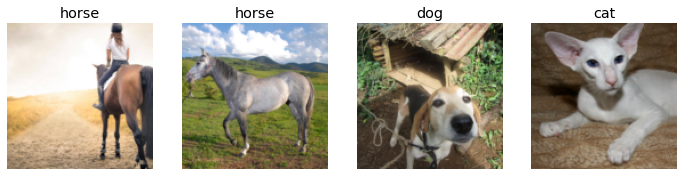

In [21]:
dls.valid.show_batch(max_n=4, nrows=1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


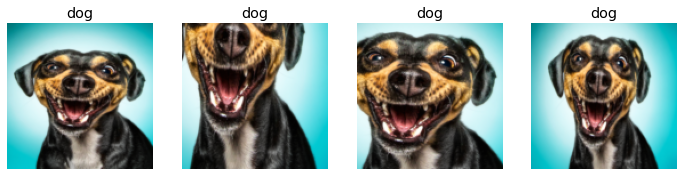

In [22]:
anims = anims.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = anims.dataloaders(path)
dls.train.show_batch(max_n = 4, nrows = 1, unique=True)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


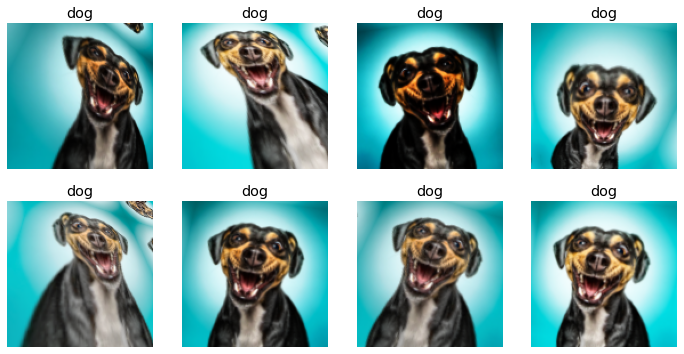

In [23]:
anims = anims.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = anims.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [24]:
anims = anims.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms = aug_transforms()
)
dls = anims.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [25]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.722740,0.184429,0.067568,00:25


epoch,train_loss,valid_loss,error_rate,time
0,0.316947,0.088945,0.054054,00:14
1,0.243721,0.084770,0.054054,00:15
2,0.170099,0.047071,0.027027,00:15
3,0.151451,0.035325,0.013514,00:15


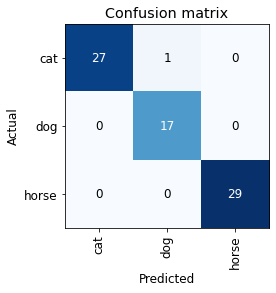

In [26]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

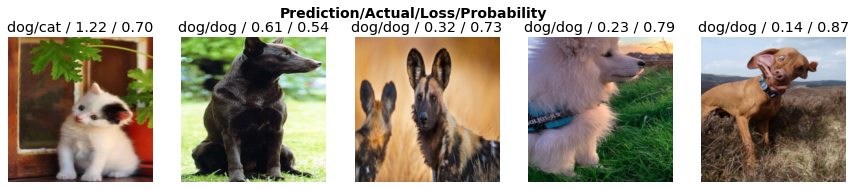

In [27]:
interp.plot_top_losses(5, nrows=1)

In [28]:
learn.export()

In [29]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [10]:
import urllib.request

In [16]:
MODEL_URL = "https://www.dropbox.com/s/az08lhvrdqbpssp/export.pkl?dl=1"
urllib.request.urlretrieve(MODEL_URL, "model.pkl")

('model.pkl', <http.client.HTTPMessage at 0x2429224cfa0>)

In [17]:
learner_inf = load_learner(Path("."), "model.pkl")

PermissionError: [Errno 13] Permission denied: '.'

In [33]:
learn_inf.predict('animals/cat/cat.jpg')

('cat', tensor(0), tensor([1.0000e+00, 2.9642e-09, 2.1304e-07]))

In [34]:
learn_inf.dls.vocab

['cat', 'dog', 'horse']

In [35]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

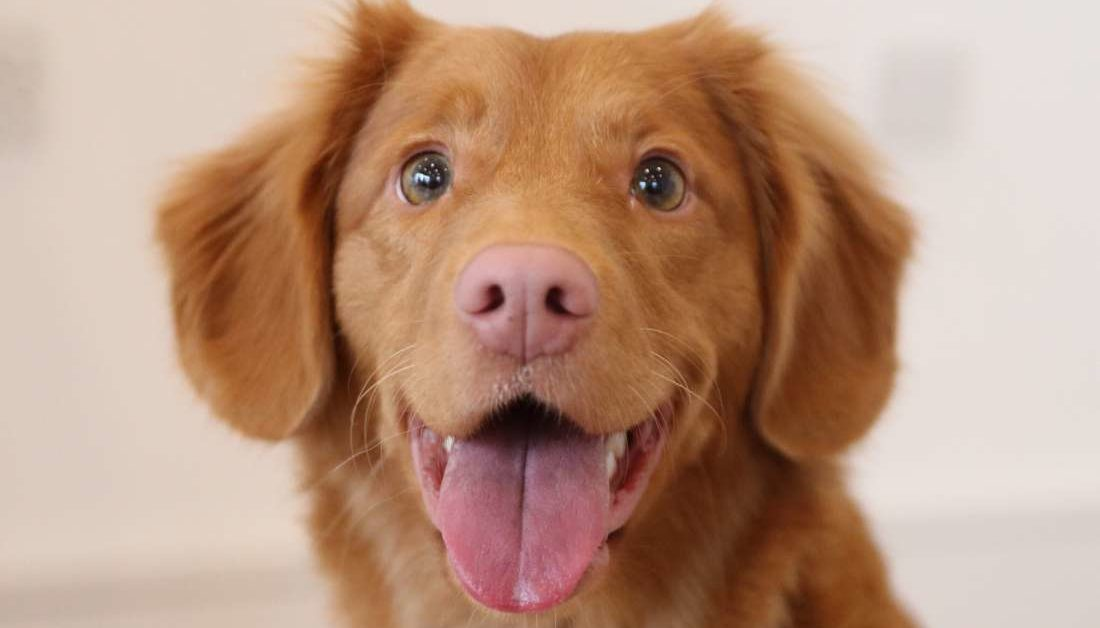

In [36]:
img = PILImage.create(btn_upload.data[-1])
img

In [37]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128, 128))
out_pl

Output()

In [38]:
pred, pred_idx, probs = learn_inf.predict(img)

In [39]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]: .04f}'
lbl_pred

Label(value='Prediction: dog; Probability:  1.0000')

In [40]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [41]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(128, 128))
  pred, pred_idx, probs = learn_inf.predict(img)
  lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [42]:
btn_upload = widgets.FileUpload()

In [43]:
VBox([widgets.Label('Select your animal!'),
      btn_upload, btn_run, out_pl, lbl_pred])

In [44]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.1.5 requires pyqt5<5.13; python_version >= "3", which is not installed.
spyder 4.1.5 requires pyqtwebengine<5.13; python_version >= "3", which is not installed.
nbdev 1.1.14 requires nbconvert<6, but you have nbconvert 6.0.7 which is incompatible.



  Using cached nbconvert-6.0.7-py3-none-any.whl (552 kB)
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1


Enabling: voila
- Writing config: D:\Anaconda3\envs\tf-gpu\etc\jupyter
    - Validating...
      voila 0.2.10 ok
